# Bubble Sort
### E(n) ~ ( tp(n) + to(n) ) / 2  ...(1)

donde:	<br>
n		es el numero de elementos del array,<br>
tp(n)	es el peor tiempo (array en orden descendiente)<br>
to(n)	es el mejor tiempo (array en orden ascendente)<br>

La aproximacion se vuelve igualdad cuando n y n-1 no son
multiplos de 4, en otro caso E es ligeramente menor.

La recomendacion seria usar 99 elementos en lugar de 100
para una mejor aproximacion, midiendo tp y to varias veces
para mayor exactitud y promediar ambos valores para tener
un tp y to medios, luego reemplazar arriba.


In [12]:
# Bubble Sort
bubble_sort <- function(arr){
    n <- length(arr)
    for(i in 1:n){
        for(j in 1:(n-1)){
            if(arr[j] > arr[j+1]){
                temp <- arr[j]
                arr[j] <- arr[j+1]
                arr[j+1]<- temp
            }
        }   
    }
    return(arr)
} 
# test
N <- c(10,25,50,75,99)
k <- 1
expected_time_bubble <- vector()
test_times <- vector() #Este vector almacena el array de tiempos de ejecucion de cada test
for(j in N){
    for(i in 1:1000){
        test_1 <- sample(1:100,j)
        sort(test_1,decreasing = TRUE)
        t_inicio <- Sys.time()
        test_1 <- bubble_sort(test_1)
        t_final <- Sys.time()
        test_times[i] <- t_final-t_inicio
    }
    worst_time_bubble<- mean(test_times)
    #Ahora generamos un array para el mejor caso, que seria un array ordenado
    for(i in 1:1000){
        test_2 <- sample(1:100,j)
        sort(test_2)
        t_inicio <- Sys.time()
        test_2 <- bubble_sort(test_2)
        t_final <- Sys.time()
        test_times[i] <- t_final-t_inicio
    }
    best_time_bubble <- mean(test_times)
    
    #Ahora con los valores promedio de cada uno de sus peores casos, procedemos a reemplazar la ecuacion (1)
    #Para hallar la esperanza para n = 99
    expected_time_bubble[k] <- (best_time_bubble + worst_time_bubble)/2
    cat("La esperanza para el Bubble Sort para un array de ",j," elementos es E(",j,") = ",expected_time_bubble[k],"\n")
    #sprintf("La esperanza para el Bubble sort para un array de %f elementos es E(%f) = %f", j,j,expected_time_bubble[k])
    
    k <- k + 1
}

La esperanza para el Bubble Sort para un array de  10  elementos es E( 10 ) =  6.165755e-05 
La esperanza para el Bubble Sort para un array de  25  elementos es E( 25 ) =  0.0001428318 
La esperanza para el Bubble Sort para un array de  50  elementos es E( 50 ) =  0.0005186403 
La esperanza para el Bubble Sort para un array de  75  elementos es E( 75 ) =  0.001080035 
La esperanza para el Bubble Sort para un array de  99  elementos es E( 99 ) =  0.001835479 


# Insertion Sort
### E(n) = ( tp(n) + to(n) ) / 2  ...(2)
Como la leyenda es igual que el Bubble sort se resuelve de igual
manera, aunque aqui si se puede usar 100 elementos.

In [15]:
insertion_sort <- function(arr){
    n <- length(arr)
    for(i in 2:n){
        key <- arr[i]
        j <- i-1
        while(j>0 && key < arr[j]){
            arr[j+1] <- arr[j]
            j <- j-1
        } 
        arr[j+1] <- key
    } 
    return(arr)
} 
# test

k<- 1
N<-c(10,25,50,75,100)
expected_time_insert<- vector()
test_times <- vector()
for(j in N){
    for(i in 1:1000){
        test_3 <- sample(1:100,j)
        sort(test_3,decreasing = TRUE)
        t_inicio <- Sys.time()
        test_3 <- insertion_sort(test_3)
        t_final <- Sys.time()
        test_times[i] <- t_final-t_inicio
    }
    worst_time_insert <- mean(test_times)
    #Ahora generamos un array para el mejor caso, que seria un array ordenado
    for(i in 1:1000){
        test_4 <- sample(1:100,j)
        sort(test_4)
        t_inicio <- Sys.time()
        test_4 <- insertion_sort(test_4)
        t_final <- Sys.time()
        test_times[i] <- t_final-t_inicio
    }
    best_time_insert <- mean(test_times)
    #Ahora con los valores promedio de cada uno de sus peores casos, procedemos a reemplazar la ecuacion (1)
    #Para hallar la esperanza para n = 99
    expected_time_insert[k] <- (best_time_insert + worst_time_insert)/2
    cat("La esperanza para el Insertion Sort para un array de ",j," elementos es E(",j,") = ",expected_time_insert[k],"\n")
    k<- k+1
}

La esperanza para el Insertion Sort para un array de  10  elementos es E( 10 ) =  3.219223e-05 
La esperanza para el Insertion Sort para un array de  25  elementos es E( 25 ) =  6.084943e-05 
La esperanza para el Insertion Sort para un array de  50  elementos es E( 50 ) =  0.0002002008 
La esperanza para el Insertion Sort para un array de  75  elementos es E( 75 ) =  0.0003438518 
La esperanza para el Insertion Sort para un array de  100  elementos es E( 100 ) =  0.0006710175 


# Merge Sort
El tiempo de ejecucion no depende del ordenamiento de
los numeros, es decir E(n) = k para cierto valor de n.
En este caso, para hallar E simplemente se debe calcular
el promedio de varios casos aleatorios del mismo tamaño.

In [18]:
merge<-function(a,b) { #Une los 2 vectores a y b
    r<-numeric(length(a)+length(b))
    ai<-1; bi<-1; j<-1;
    for(j in 1:length(r)) {
        if((ai<=length(a) && a[ai]<b[bi]) || bi>length(b)) {
            r[j] <- a[ai]
            ai <- ai+1
        } else { 
            r[j] <- b[bi]
            bi <- bi+1          
        }
    }
    return(r)
} 
merge_sort<-function(A) {
    if(length(A)>1) {
        q <- ceiling(length(A)/2) # length(A)/2 si length(A) par o length(A)+1 /2 para length(A) impar
        a <- merge_sort(A[1:q])
        b <- merge_sort(A[(q+1):length(A)])
        merge(a,b)
    } else { 
        return(A)
    } 
}
# test
test_times <- vector()
k<-1
N<-c(10,25,50,75,100)
expected_time_merge <- vector()
for(j in N){
    for(i in 1:10000){
        test_5 <- sample(1:100,j)
        t_inicio <- Sys.time()
        test_5 <- merge_sort(test_5)
        t_final <- Sys.time()
        test_times[i] <- t_final - t_inicio
    }
    expected_time_merge[k] <- mean(test_times)
    cat("La esperanza para el Merge Sort para un array de ",j," elementos es E(",j,") = ",expected_time_merge[k],"\n")
    k<- k+1
}

La esperanza para el Merge Sort para un array de  10  elementos es E( 10 ) =  9.523218e-05 
La esperanza para el Merge Sort para un array de  25  elementos es E( 25 ) =  0.0002352301 
La esperanza para el Merge Sort para un array de  50  elementos es E( 50 ) =  0.000495109 
La esperanza para el Merge Sort para un array de  75  elementos es E( 75 ) =  0.0007599532 
La esperanza para el Merge Sort para un array de  100  elementos es E( 100 ) =  0.001031311 


# Quick Sort
El algoritmo Quicksort usa un método llamado de “pivote” donde él ultimo termino generalmente se usa como pivote, 
en este caso, se ha aplicado el algoritmo a un grupo de 100 datos numéricos entre el 1 y el 1000 que son generados
aleatoriamente y luego son ordenados de manera ascendente mediante el algoritmo quicksort.<br>
Debido a que la eficiencia del algoritmo varia significativamente según la posición que ocupará el “pivote” al ser ordenado,
se ha colocado la posición del “pivote” tras el ordenamiento y a su vez se ha colocado el tiempo del que tardó el algoritmo
en realizar el ordenamiento.<br>
Se observará que el mejor tiempo se dará cuando el “pivote” sea la mediana de los términos ordenados. Y que el peor de los
casos, será cuando este ocupe la primera o ultima posición de los términos ordenados.<br>

In [20]:
#
partition = function(data, i, f){				# Se ordena el array respecto al ultimo elemento
    pivot = data[f-1]
    mid = i
    num = i
    
    while(num < f-1){
        if(data[num] < pivot){
            buffer = data[mid]
            data[mid] = data[num]
            data[num] = buffer
            mid = mid+1
        }
        num = num+1
    }
    
    data[f-1] = data[mid]
    data[mid] = pivot
    
    lista = list("d"=data,"n"=mid)				# Se retorna una lista con el array y el pivote
    return(lista)
}

quick = function(data, i, f){					# Funcion recursiva del quicksort
    if(f-i > 1){
        lista = partition(data, i, f)
        data = lista$d
        mid = lista$n
        
        data=quick(data, i, mid)
        data=quick(data, mid+1, f)
    }
    return(data)
}

quicksort = function(data){						# Funcion meramente estetica
    return(quick(data, 1, length(data)+1))
}
# test
test_times1 <- vector()
k<-1
expected_time_quick <- vector()
for(j in N){
    for(i in 1:10000){
        test_6 <- sample(1:100,j)
        t_inicio <- Sys.time()
        quicksort(test_6)
        t_final <- Sys.time()
        test_times1[i] <- t_final - t_inicio
    }
    expected_time_quick[k] <- mean(test_times1)
    cat("La esperanza para el Quick Sort para un array de ",j," elementos es E(",j,") = ",expected_time_quick[k],"\n")
    k<- k+1
}

La esperanza para el Quick Sort para un array de  10  elementos es E( 10 ) =  5.941045e-05 
La esperanza para el Quick Sort para un array de  25  elementos es E( 25 ) =  0.0001396892 
La esperanza para el Quick Sort para un array de  50  elementos es E( 50 ) =  0.0002891735 
La esperanza para el Quick Sort para un array de  75  elementos es E( 75 ) =  0.0004373971 
La esperanza para el Quick Sort para un array de  100  elementos es E( 100 ) =  0.0005909096 


# Bucket Sort
El algoritmo de Bucketsort es una “variante” del algoritmo de Quicksort ya explicado antes, lo que se hace es dividir los datos
numéricos entre una potencia de 10, tal que todos tengan al menos un decimal, después de esto se tomará máximo entero a cada término, y los que tengan el mismo máximo entero se agruparán en un sub-array o también llamado “cubeta”(Bucket), finalmente se aplicará Quicksort dentro de cada cubeta y se procederá multiplicar por la misma potencia de 10 entre la cual se dividió. Cabe destacar que la esperanza de este método es n^2, y que la esperanza del quicksort para cantidades pequeñas de datos es casi lineal.<br>
Finalmente diremos que el Bucketsort adquiere su máxima efectividad cuando las cubetas está distribuidas de manera igual o muy parecida, o sea cuando cada cubeta tiene (casi) el mismo numero de elementos.<br>

In [22]:
bucketsort = function(data){					# Se crea una lista de 10 canastas o buckets
    buckets = list(c(), c(), c(), c(), c(), c(), c(), c(), c(), c())
    i = 1
    while(i <= length(data)){					# Se añaden los elementos mediante hash
        index = ceiling(data[i]/10)
        buckets[[index]] = c(buckets[[index]], data[i])
        i = i+1
    }
    i = 1
    newData = c()
    while(i <= 10){								# Se llama a quicksort dentro de cada bucket
        adding = quicksort(buckets[[i]])
        newData = c(newData, adding)
        i = i+1
    }
    return(newData)								# Retorna la suma de todos los buckets
}
# test
test_times2 <- vector()
k<-1
expected_time_bucket <- vector()
for(j in N){
    for(i in 1:10000){
        test_7 <- sample(1:100,j)
        t_inicio <- Sys.time()
        bucketsort(test_7)
        t_final <- Sys.time()
        test_times2[i] <- t_final - t_inicio
    }
    expected_time_bucket[k] <- mean(test_times2)
    cat("La esperanza para el Bucket Sort para un array de ",j," elementos es E(",j,") = ",expected_time_bucket[k],"\n")
    k<- k+1
}

La esperanza para el Bucket Sort para un array de  10  elementos es E( 10 ) =  7.414262e-05 
La esperanza para el Bucket Sort para un array de  25  elementos es E( 25 ) =  0.0001627132 
La esperanza para el Bucket Sort para un array de  50  elementos es E( 50 ) =  0.0002960197 
La esperanza para el Bucket Sort para un array de  75  elementos es E( 75 ) =  0.0004138448 
La esperanza para el Bucket Sort para un array de  100  elementos es E( 100 ) =  0.0005635857 


# Gráfica T vs N

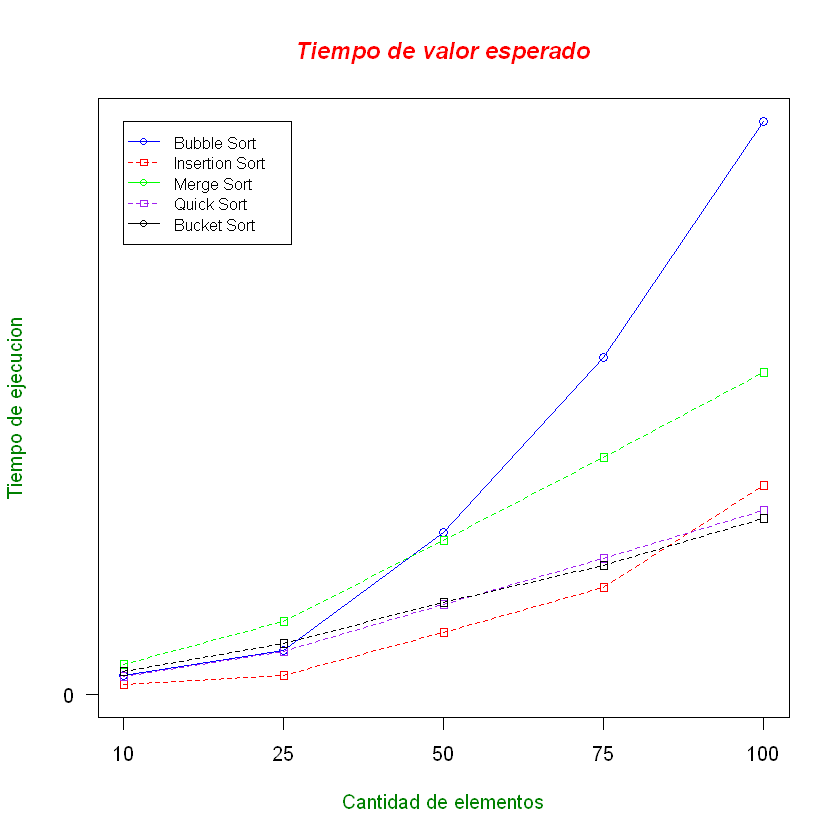

In [24]:
g_range <- range(0, max(expected_time_bubble,expected_time_bucket,expected_time_insert,expected_time_insert,expected_time_merge,expected_time_quick))

plot(expected_time_bubble, type="o", col="blue", ylim=g_range, 
     axes=FALSE, ann=FALSE)
#eje X
axis(1, at=1:5, lab=c("10","25","50","75","100"))
#eje Y
axis(2,  las=1, at=0.00005*0:g_range[2])
box()
#Lineas para cada algoritmo
lines(expected_time_insert, type="o", pch=22, lty=2, col="red")
lines(expected_time_merge, type="o", pch=22, lty=2, col="green")
lines(expected_time_quick, type="o", pch=22, lty=2, col="purple")
lines(expected_time_bucket, type="o", pch=22, lty=2, col="1")
#Titulo
title(main="Tiempo de valor esperado", col.main="red", font.main=4)
#Eje x
title(xlab="Cantidad de elementos", col.lab=rgb(0,0.5,0))
#Eje Y
title(ylab="Tiempo de ejecucion", col.lab=rgb(0,0.5,0))
#Leyenda
legend(1, g_range[2], c("Bubble Sort","Insertion Sort","Merge Sort","Quick Sort","Bucket Sort"), cex=0.8, 
       col=c("blue","red","green","purple","1"), pch=21:22, lty=1:2)
